In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

# Data Exploration

In [3]:
matches.head(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [4]:
matches.tail(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma
1094,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon


In [5]:
deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [6]:
deliveries.tail(5)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260919,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,3,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [7]:
matches.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


In [8]:
deliveries.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


In [9]:
matches.shape

(1095, 20)

In [10]:
deliveries.shape

(260920, 17)

In [11]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [12]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [13]:
matches.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [14]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

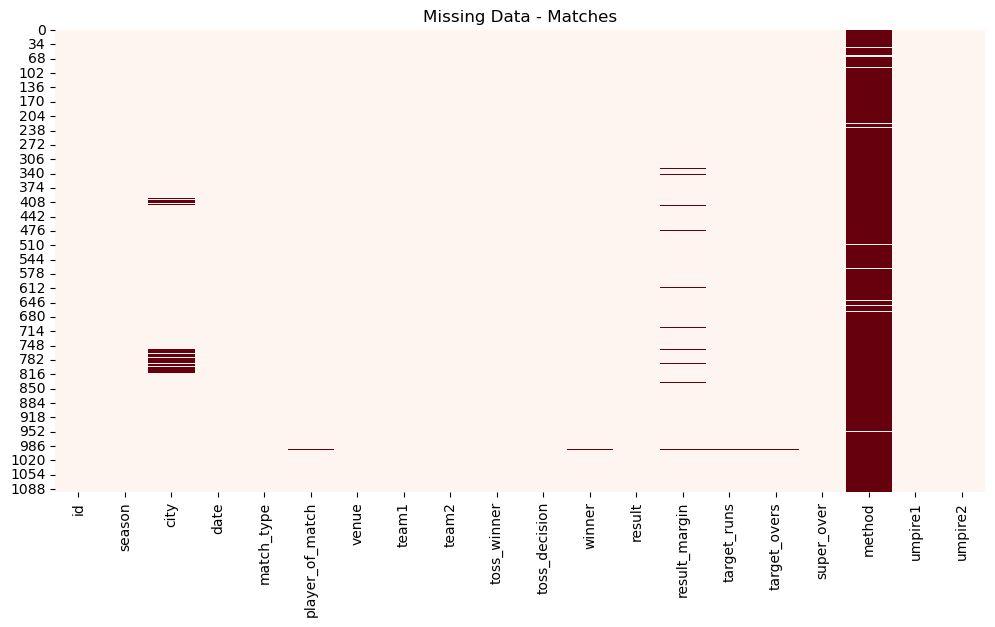

In [15]:
plt.figure(figsize = (12, 6))
sns.heatmap(matches.isnull(), cbar = False, cmap = 'Reds')
plt.title('Missing Data - Matches')
plt.show()

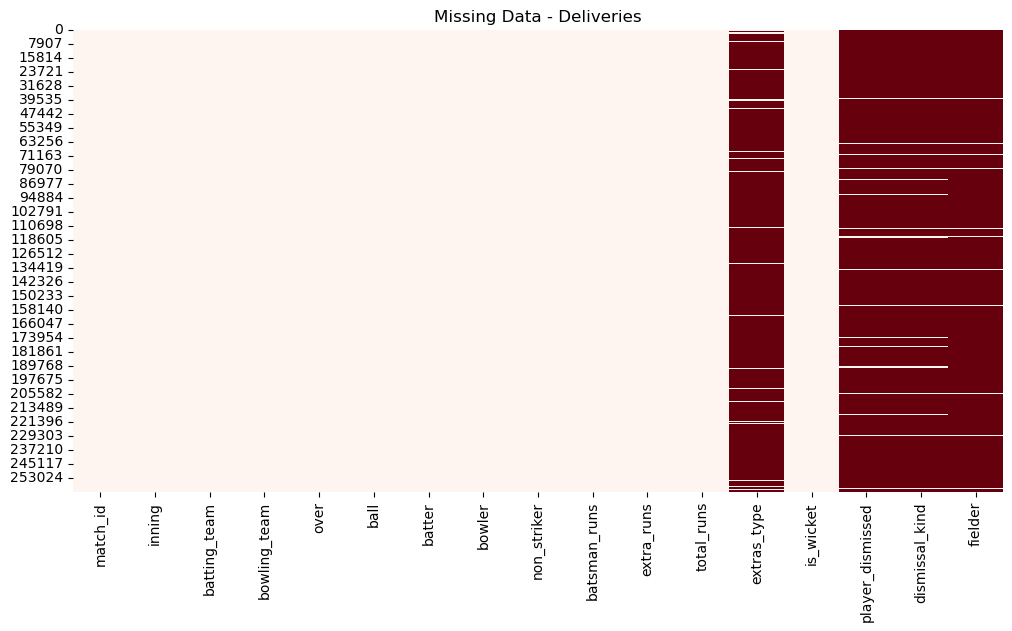

In [16]:
plt.figure(figsize = (12, 6))
sns.heatmap(deliveries.isnull(), cbar = False, cmap = 'Reds')
plt.title('Missing Data - Deliveries')
plt.show()

# Data Cleaning

In [17]:
matches['season'] = matches['season'].replace({'2007/08':'2008', '2009/10':'2010', '2020/21':'2020'})

In [18]:
matches[matches['season'] == '2008']

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2008,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2008,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2008,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2008,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
5,335987,2008,Jaipur,2008-04-21,League,SR Watson,Sawai Mansingh Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,167.0,20.0,N,NaN,Aleem Dar,RB Tiffin
6,335988,2008,Hyderabad,2008-04-22,League,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils,wickets,9.0,143.0,20.0,N,NaN,IL Howell,AM Saheba
7,335989,2008,Chennai,2008-04-23,League,ML Hayden,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,209.0,20.0,N,NaN,DJ Harper,GA Pratapkumar
8,335990,2008,Hyderabad,2008-04-24,League,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,215.0,20.0,N,NaN,Asad Rauf,MR Benson
9,335991,2008,Chandigarh,2008-04-25,League,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,183.0,20.0,N,NaN,Aleem Dar,AM Saheba


In [19]:
matches['city'] = matches['city'].replace({'Bengaluru':'Bengalore'})

In [20]:
matches[matches['city'] == 'Bengalore']

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
581,1082595,2017,Bengalore,2017-04-08,League,KM Jadhav,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,runs,15.0,158.0,20.0,N,NaN,S Ravi,VK Sharma
643,1136568,2018,Bengalore,2018-04-13,League,UT Yadav,M.Chinnaswamy Stadium,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,4.0,156.0,20.0,N,NaN,A Deshmukh,S Ravi
646,1136571,2018,Bengalore,2018-04-15,League,SV Samson,M.Chinnaswamy Stadium,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Rajasthan Royals,runs,19.0,218.0,20.0,N,NaN,C Shamshuddin,S Ravi
654,1136579,2018,Bengalore,2018-04-21,League,AB de Villiers,M.Chinnaswamy Stadium,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,6.0,175.0,20.0,N,NaN,CB Gaffaney,CK Nandan
659,1136584,2018,Bengalore,2018-04-25,League,MS Dhoni,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,5.0,206.0,20.0,N,NaN,NJ Llong,VK Sharma
664,1136589,2018,Bengalore,2018-04-29,League,CA Lynn,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,6.0,176.0,20.0,N,NaN,AK Chaudhary,NJ Llong
666,1136591,2018,Bengalore,2018-05-01,League,TG Southee,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,runs,14.0,168.0,20.0,N,NaN,M Erasmus,Nitin Menon
686,1136611,2018,Bengalore,2018-05-17,League,AB de Villiers,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Royal Challengers Bangalore,runs,14.0,219.0,20.0,N,NaN,AY Dandekar,S Ravi
702,1175362,2019,Bengalore,2019-03-28,League,JJ Bumrah,M.Chinnaswamy Stadium,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Mumbai Indians,runs,6.0,188.0,20.0,N,NaN,CK Nandan,S Ravi
712,1175372,2019,Bengalore,2019-04-05,League,AD Russell,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,5.0,206.0,20.0,N,NaN,AK Chaudhary,CB Gaffaney


In [21]:
matches.loc[(matches['venue'] == 'Dubai International cricket Stadium') & (matches['city'].isna()), 'city'] = 'Dubai'

In [22]:
matches[matches['city'] == 'Dubai']

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
845,1254104,2021,Dubai,2021-09-19,League,RD Gaikwad,Dubai International Cricket Stadium,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,Chennai Super Kings,runs,20.0,157.0,20.0,N,NaN,Nitin Menon,RK Illingworth
847,1254111,2021,Dubai,2021-09-21,League,Kartik Tyagi,Dubai International Cricket Stadium,Rajasthan Royals,Punjab Kings,Punjab Kings,field,Rajasthan Royals,runs,2.0,186.0,20.0,N,NaN,AK Chaudhary,MA Gough
848,1254105,2021,Dubai,2021-09-22,League,A Nortje,Dubai International Cricket Stadium,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,Delhi Capitals,wickets,8.0,135.0,20.0,N,NaN,KN Ananthapadmanabhan,RK Illingworth
854,1254108,2021,Dubai,2021-09-26,League,GJ Maxwell,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,runs,54.0,166.0,20.0,N,NaN,AK Chaudhary,MA Gough
855,1254100,2021,Dubai,2021-09-27,League,JJ Roy,Dubai International Cricket Stadium,Rajasthan Royals,Sunrisers Hyderabad,Rajasthan Royals,bat,Sunrisers Hyderabad,wickets,7.0,165.0,20.0,N,NaN,KN Ananthapadmanabhan,Navdeep Singh
858,1254103,2021,Dubai,2021-09-29,League,YS Chahal,Dubai International Cricket Stadium,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,150.0,20.0,N,NaN,AY Dandekar,KN Ananthapadmanabhan
860,1254102,2021,Dubai,2021-10-01,League,KL Rahul,Dubai International Cricket Stadium,Kolkata Knight Riders,Punjab Kings,Punjab Kings,field,Punjab Kings,wickets,5.0,166.0,20.0,N,NaN,KN Ananthapadmanabhan,RK Illingworth
864,1254109,2021,Dubai,2021-10-03,League,Shubman Gill,Dubai International Cricket Stadium,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,6.0,116.0,20.0,N,NaN,J Madanagopal,MA Gough
865,1254110,2021,Dubai,2021-10-04,League,AR Patel,Dubai International Cricket Stadium,Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,Delhi Capitals,wickets,3.0,137.0,20.0,N,NaN,AK Chaudhary,Nitin Menon
868,1254094,2021,Dubai,2021-10-07,League,KL Rahul,Dubai International Cricket Stadium,Chennai Super Kings,Punjab Kings,Punjab Kings,field,Punjab Kings,wickets,6.0,135.0,20.0,N,NaN,K Srinivasan,RK Illingworth


In [23]:
matches.loc[(matches['venue'] == 'Sharjah Cricket Stadium') & (matches['city'].isna()), 'city'] = 'Sharjah'

In [24]:
matches[matches['city'] == 'Dubai']

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
845,1254104,2021,Dubai,2021-09-19,League,RD Gaikwad,Dubai International Cricket Stadium,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,Chennai Super Kings,runs,20.0,157.0,20.0,N,NaN,Nitin Menon,RK Illingworth
847,1254111,2021,Dubai,2021-09-21,League,Kartik Tyagi,Dubai International Cricket Stadium,Rajasthan Royals,Punjab Kings,Punjab Kings,field,Rajasthan Royals,runs,2.0,186.0,20.0,N,NaN,AK Chaudhary,MA Gough
848,1254105,2021,Dubai,2021-09-22,League,A Nortje,Dubai International Cricket Stadium,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,Delhi Capitals,wickets,8.0,135.0,20.0,N,NaN,KN Ananthapadmanabhan,RK Illingworth
854,1254108,2021,Dubai,2021-09-26,League,GJ Maxwell,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,runs,54.0,166.0,20.0,N,NaN,AK Chaudhary,MA Gough
855,1254100,2021,Dubai,2021-09-27,League,JJ Roy,Dubai International Cricket Stadium,Rajasthan Royals,Sunrisers Hyderabad,Rajasthan Royals,bat,Sunrisers Hyderabad,wickets,7.0,165.0,20.0,N,NaN,KN Ananthapadmanabhan,Navdeep Singh
858,1254103,2021,Dubai,2021-09-29,League,YS Chahal,Dubai International Cricket Stadium,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,150.0,20.0,N,NaN,AY Dandekar,KN Ananthapadmanabhan
860,1254102,2021,Dubai,2021-10-01,League,KL Rahul,Dubai International Cricket Stadium,Kolkata Knight Riders,Punjab Kings,Punjab Kings,field,Punjab Kings,wickets,5.0,166.0,20.0,N,NaN,KN Ananthapadmanabhan,RK Illingworth
864,1254109,2021,Dubai,2021-10-03,League,Shubman Gill,Dubai International Cricket Stadium,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,6.0,116.0,20.0,N,NaN,J Madanagopal,MA Gough
865,1254110,2021,Dubai,2021-10-04,League,AR Patel,Dubai International Cricket Stadium,Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,Delhi Capitals,wickets,3.0,137.0,20.0,N,NaN,AK Chaudhary,Nitin Menon
868,1254094,2021,Dubai,2021-10-07,League,KL Rahul,Dubai International Cricket Stadium,Chennai Super Kings,Punjab Kings,Punjab Kings,field,Punjab Kings,wickets,6.0,135.0,20.0,N,NaN,K Srinivasan,RK Illingworth


In [25]:
matches['venue'] = matches['venue'].replace({ 'Arun jaitley Stadium, Delhi': 'Arun Jaitley Stadium',
    'Brabourne Stadium, Mumbai': 'Brabourne Stadium',
    'Dr DY Patil Sports Academy, Mumbai': 'Dr DY Patil Sports Academy',
    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam': 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
    'Eden Gardens, Kolkata': 'Eden Gardens',
    'Himachal Pradesh Cricket Association Stadium, Dharamsala': 'Dharamsala',
    'M Chinnaswamy Stadium, Bengaluru': 'M Chinnaswamy Stadium',
    'M.Chinnaswamy Stadium': 'M Chinnaswamy Stadium',
    'MA Chidambaram Stadium, Chepauk, Chennai': 'MA Chidambaram Stadium',
    'MA Chidambaram Stadium, Chepauk': 'MA Chidambaram Stadium',
    'MA Chidambaram Stadium': 'Maharashtra Cricket Association Stadium',
    'Punjab Cricket Association IS Bindra Stadium, Mohali': 'Punjab Cricket Association IS Bindra Stadium',
    'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh': 'Punjab Cricket Association IS Bindra Stadium',
    'Punjab Cricket Association Stadium, Mohali': 'Punjab Cricket Association IS Bindra Stadium',
    'Rajiv Gandhi International Stadium, Uppal': 'Rajiv Gandhi International Stadium',
    'Rajiv Gandhi International Stadium, Uppal, Hyderabad': 'Rajiv Gandhi International Stadium',
    'Sawai Mansingh Stadium, Jaipur': 'Sawai Mansingh Stadium',
    'Zayed Cricket Stadium, Abu Dhabi': 'Sheikh Zayed Stadium',
    'Wankhede Stadium, Mumbai': 'Wankhede Stadium' 
})

In [26]:
team_name_map = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Rising Pune Supergiant': 'Rising Pune Supergiants',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore'
}
for name in ['team1', 'team2', 'toss_winner', 'winner']:
    matches[name] = matches[name].replace(team_name_map)
for name in ['batting_team', 'bowling_team']:
    deliveries[name] = deliveries[name].replace(team_name_map)

# Data Analysis

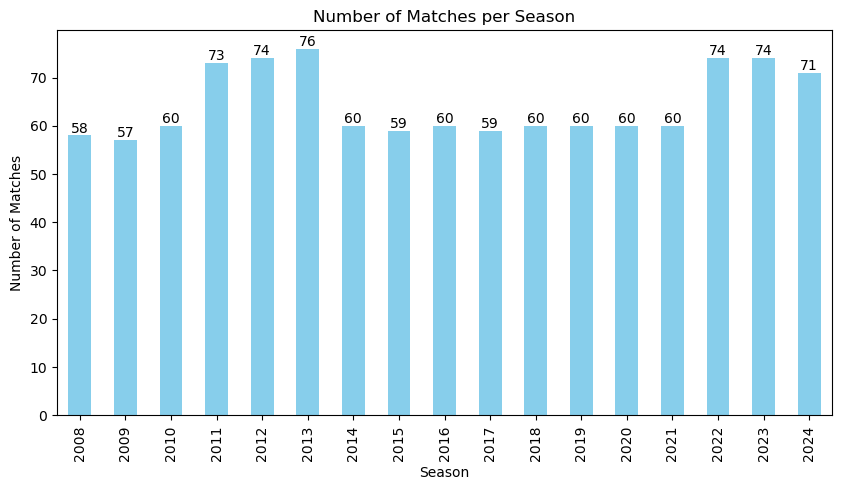

In [27]:
# 1. Total Matches Played Per Season
res = matches['season'].value_counts().sort_index()
plt.figure(figsize = (10, 5))
ax = res.plot(kind = 'bar', color = 'skyblue')
plt.title('Number of Matches per Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
ax.bar_label(ax.containers[0])
plt.show()

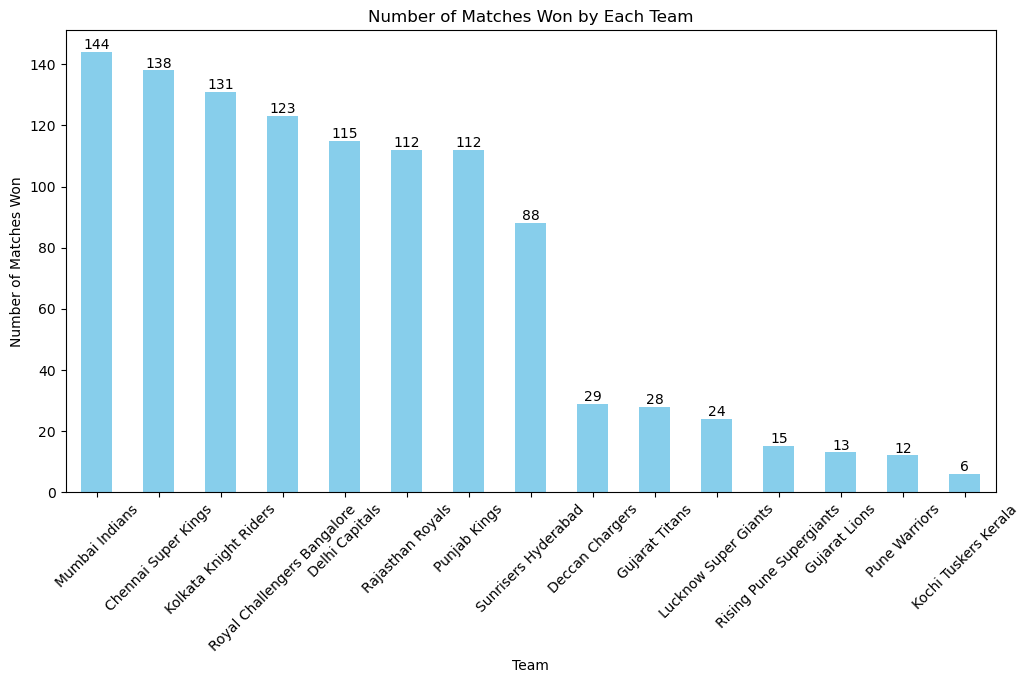

In [28]:
# 2. Most Matches Won by Each Team
res = matches['winner'].value_counts()
plt.figure(figsize = (12, 6))
ax = res.plot(kind = 'bar', color = 'skyblue')
plt.title('Number of Matches Won by Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Matches Won')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.show()

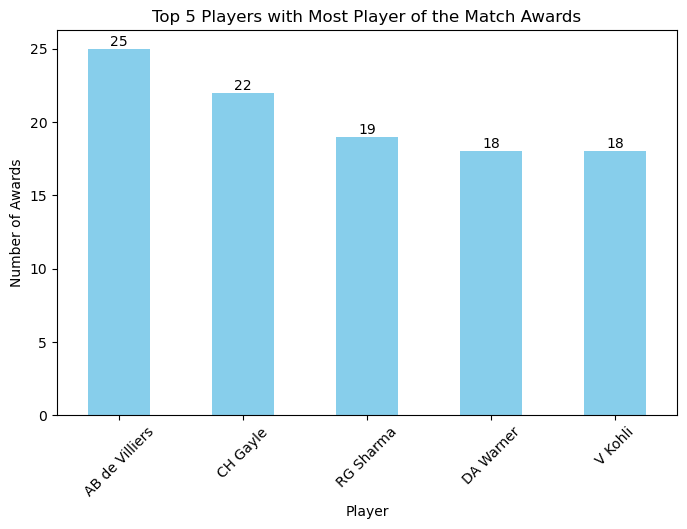

In [29]:
# 3. Top 5 Players with Most Player of the Match Awards
res = matches['player_of_match'].value_counts().head(5)
plt.figure(figsize = (8, 5))
ax = res.plot(kind = 'bar', color = 'skyblue')
plt.title('Top 5 Players with Most Player of the Match Awards')
plt.xlabel('Player')
plt.ylabel('Number of Awards')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.show()

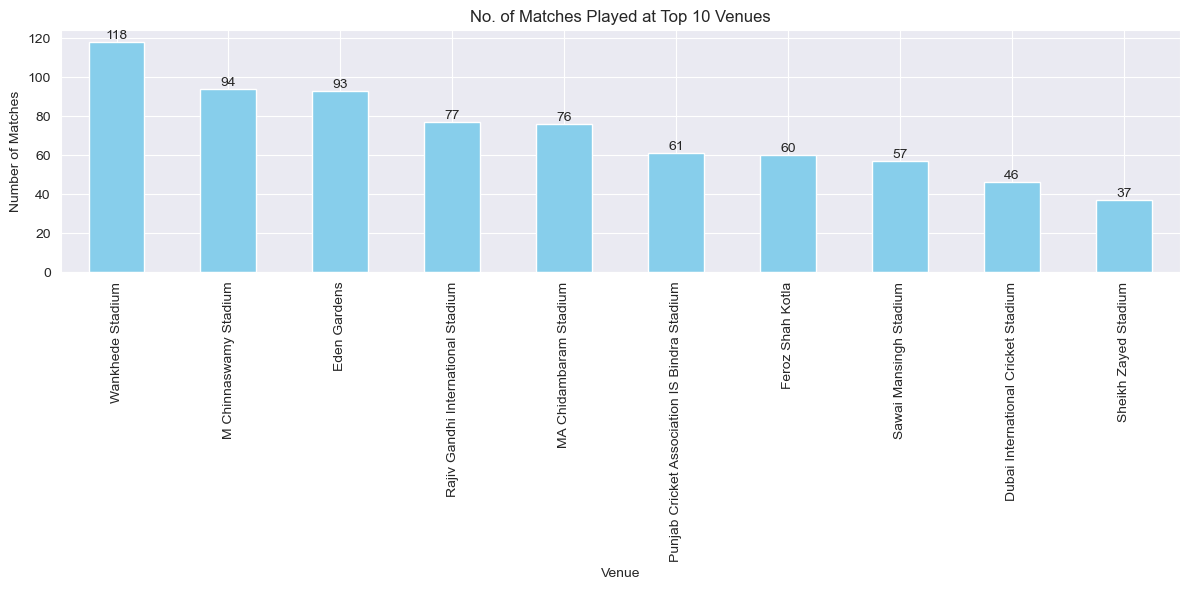

In [46]:
# 4. Count of Matches Played in Top 10 Venue
res = matches['venue'].value_counts().head(10)
plt.figure(figsize = (12, 6))
ax = res.plot(kind = 'bar', color = 'skyblue')
plt.title('No. of Matches Played at Top 10 Venues')
plt.xlabel('Venue')
plt.ylabel('Number of Matches')
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

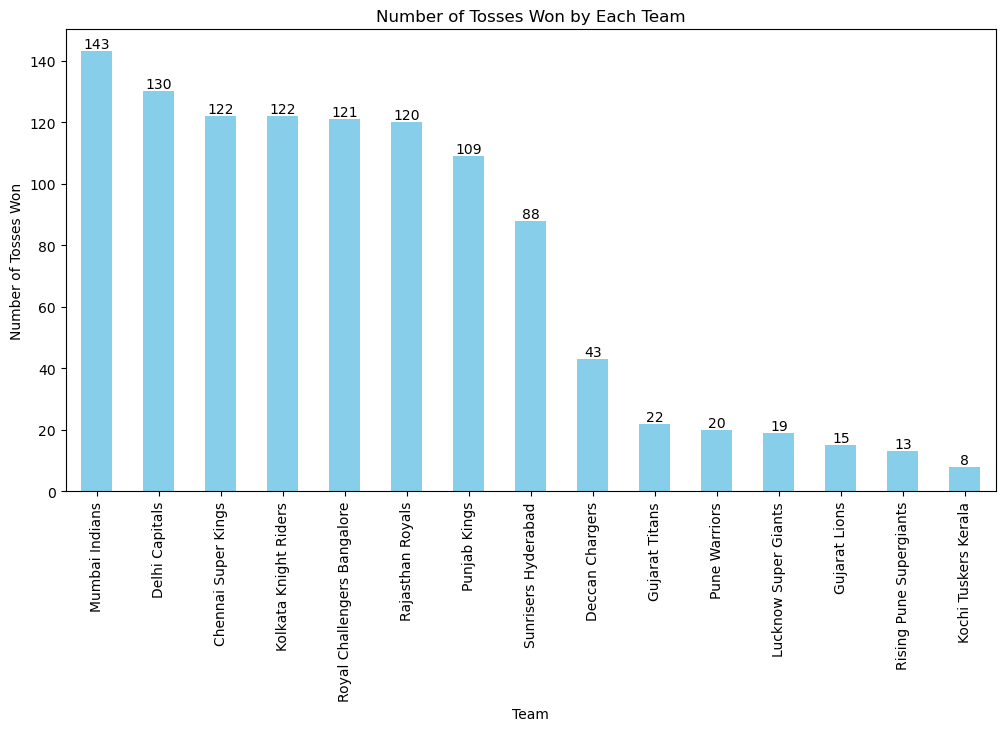

In [31]:
# 5. Which Team Won the Most Tosses
res = matches['toss_winner'].value_counts()
plt.figure(figsize = (12, 6))
ax = res.plot(kind = 'bar', color = 'skyblue')
plt.title('Number of Tosses Won by Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Tosses Won')
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0])
plt.show()

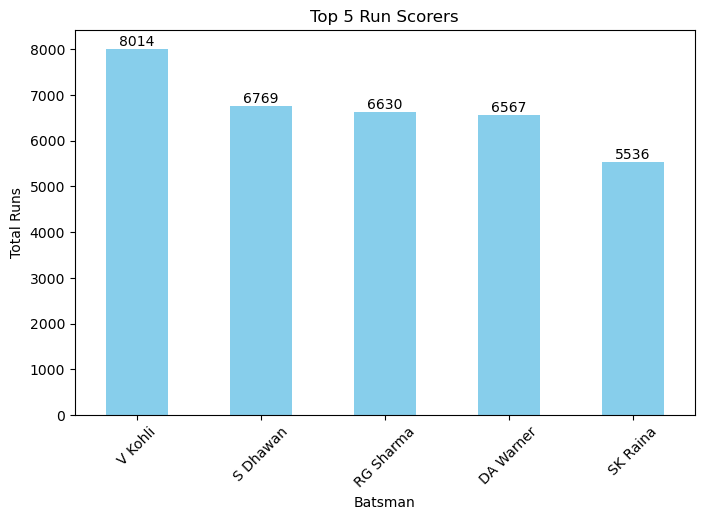

In [32]:
# 6. Top 5 Run Scorers
res = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending = False).head(5)
plt.figure(figsize = (8, 5))
ax = res.plot(kind = 'bar', color = 'skyblue')
plt.title('Top 5 Run Scorers')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.show()

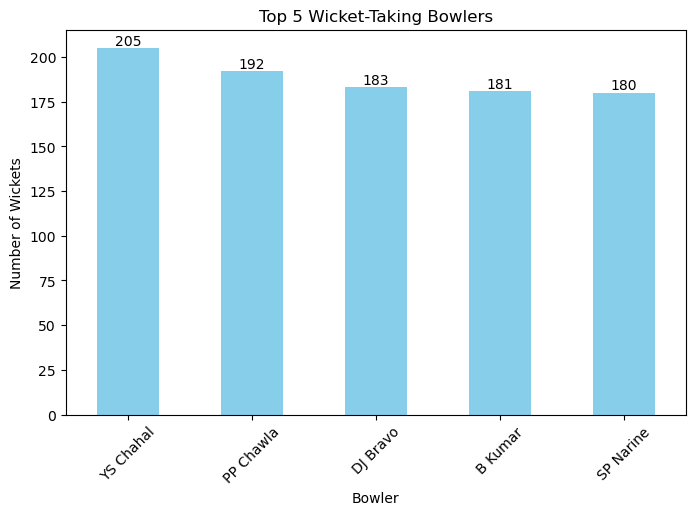

In [33]:
# 7. Top 5 Bowlers with Most Wickets
res = deliveries[(deliveries['is_wicket'] == 1) & ~(deliveries['dismissal_kind'].isin(['run out', 'retired hurt']))].groupby(
    'bowler')['is_wicket'].sum().sort_values(ascending = False).head(5)
plt.figure(figsize = (8, 5))
ax = res.plot(kind = 'bar', color = 'skyblue')
plt.title('Top 5 Wicket-Taking Bowlers')
plt.xlabel('Bowler')
plt.ylabel('Number of Wickets')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.show()

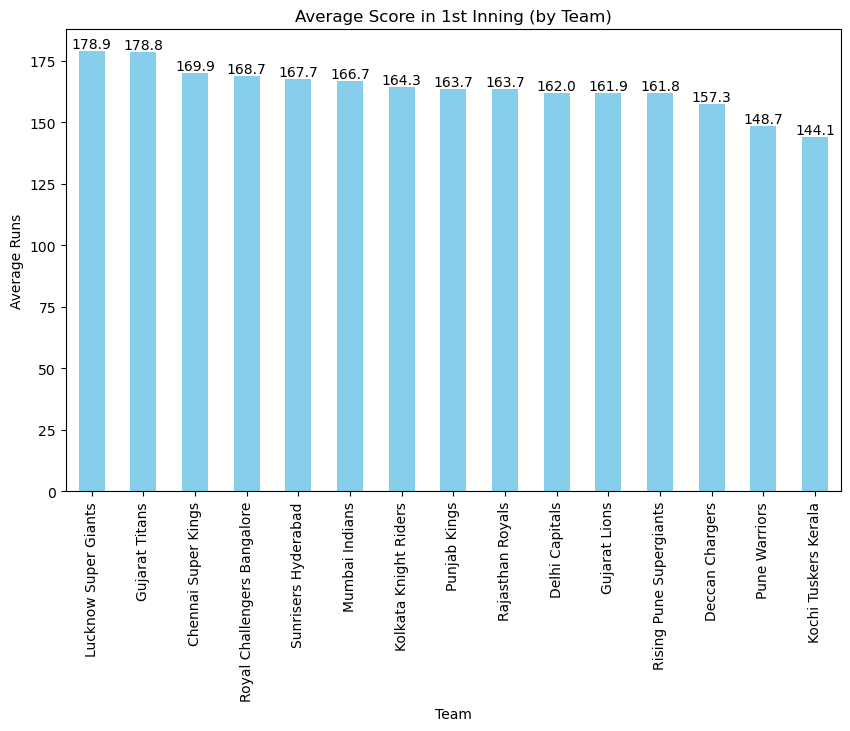

In [34]:
# 8. Team-wise Average Score in 1st Inning
res = deliveries[(deliveries['inning'] == 1)].groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index().groupby(
    'batting_team')['total_runs'].mean().sort_values(ascending=False)
plt.figure(figsize = (10, 6))
ax = res.plot(kind = 'bar', color = 'skyblue')
plt.title('Average Score in 1st Inning (by Team)')
plt.xlabel('Team')
plt.ylabel('Average Runs')
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.show()

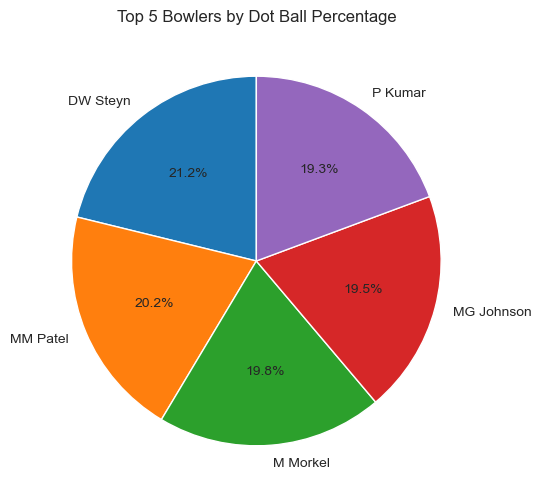

In [47]:
# 9. Bowler with Highest Dot Ball % (min 1000 balls)
bowler_data = deliveries.groupby('bowler')['total_runs'].agg(['count', lambda x: (x==0).sum()])
bowler_data.columns = ['total_balls', 'dot_balls']
bowler_data = bowler_data[bowler_data['total_balls'] > 1000]
bowler_data['dot_percent'] = bowler_data['dot_balls'] * 100 / bowler_data['total_balls']
highest_dot = bowler_data.sort_values(by='dot_percent', ascending = False).head(5)

plt.figure(figsize = (6, 6))
plt.pie(highest_dot['dot_percent'], labels = highest_dot.index, autopct = '%1.1f%%', startangle = 90)
plt.title('Top 5 Bowlers by Dot Ball Percentage')
plt.show()

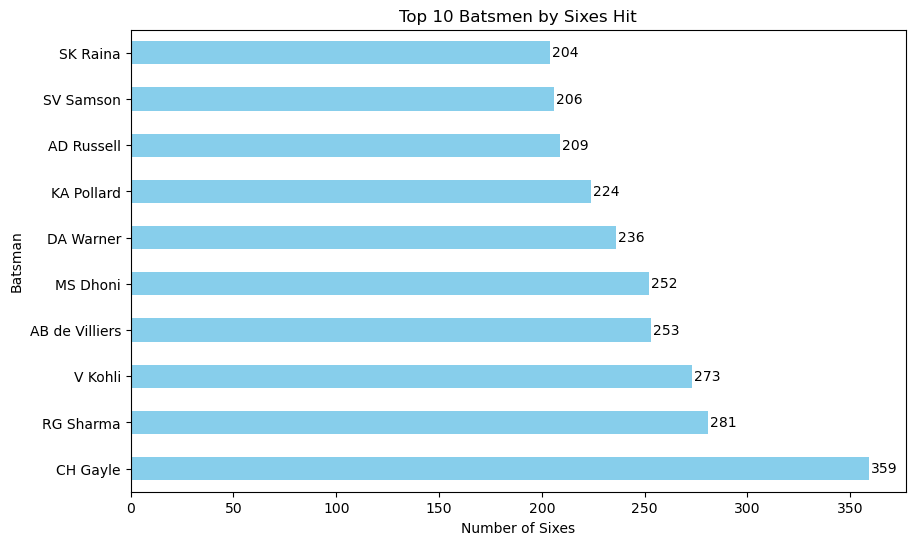

In [36]:
# 10. Player with Most Sixes (Top 10)
res = deliveries[deliveries['batsman_runs'] == 6]['batter'].value_counts().head(10)
plt.figure(figsize = (10, 6))
ax = res.plot(kind = 'barh', color = 'skyblue')
plt.title('Top 10 Batsmen by Sixes Hit')
plt.xlabel('Number of Sixes')
plt.ylabel('Batsman')

for i, v in enumerate(res.values):
    ax.text(v + 1, i, str(v), color = 'black', va = 'center')

plt.show()

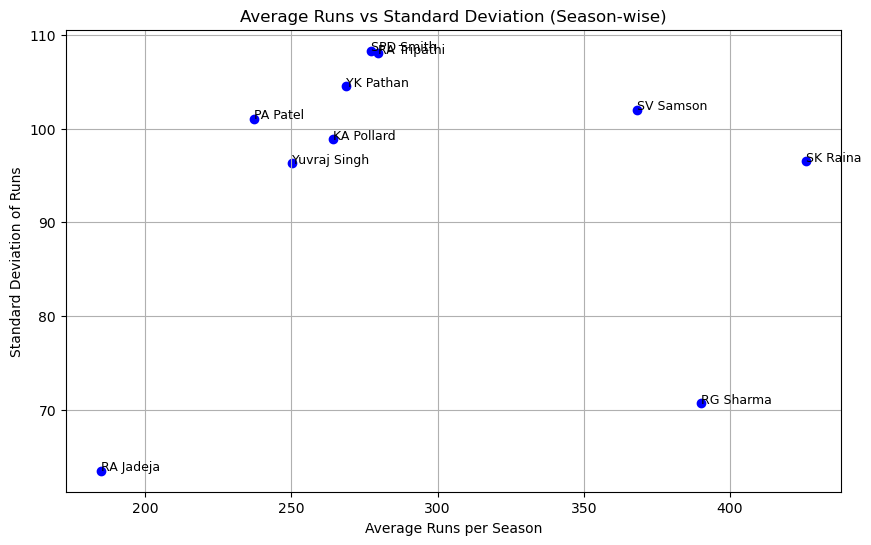

In [37]:
# 11. Most Consistent Batsmen Across Seasons (Top 10)
season_runs = deliveries.merge(matches[['id', 'season']], left_on = 'match_id', right_on = 'id')
seasonwise_runs = season_runs.groupby(['season', 'batter'])['batsman_runs'].sum().reset_index()
summary = seasonwise_runs.groupby('batter').agg(
    seasons_played = ('season', 'nunique'),
    avg_runs = ('batsman_runs', 'mean'),
    std_dev = ('batsman_runs', 'std'),
    total_runs = ('batsman_runs', 'sum')
)
summary = summary[(summary['seasons_played'] >= 7) & (summary['total_runs'] > 2000)]
summary = summary.sort_values(by = ['std_dev', 'avg_runs']).head(10)

plt.figure(figsize = (10, 6))
plt.scatter(summary['avg_runs'], summary['std_dev'], color = 'blue')
plt.title('Average Runs vs Standard Deviation (Season-wise)')
plt.xlabel('Average Runs per Season')
plt.ylabel('Standard Deviation of Runs')
for i, (name, avg, std) in enumerate(zip(summary.index, summary['avg_runs'], summary['std_dev'])):
    plt.text(avg, std, name, fontsize = 9)
plt.grid(True)
plt.show()

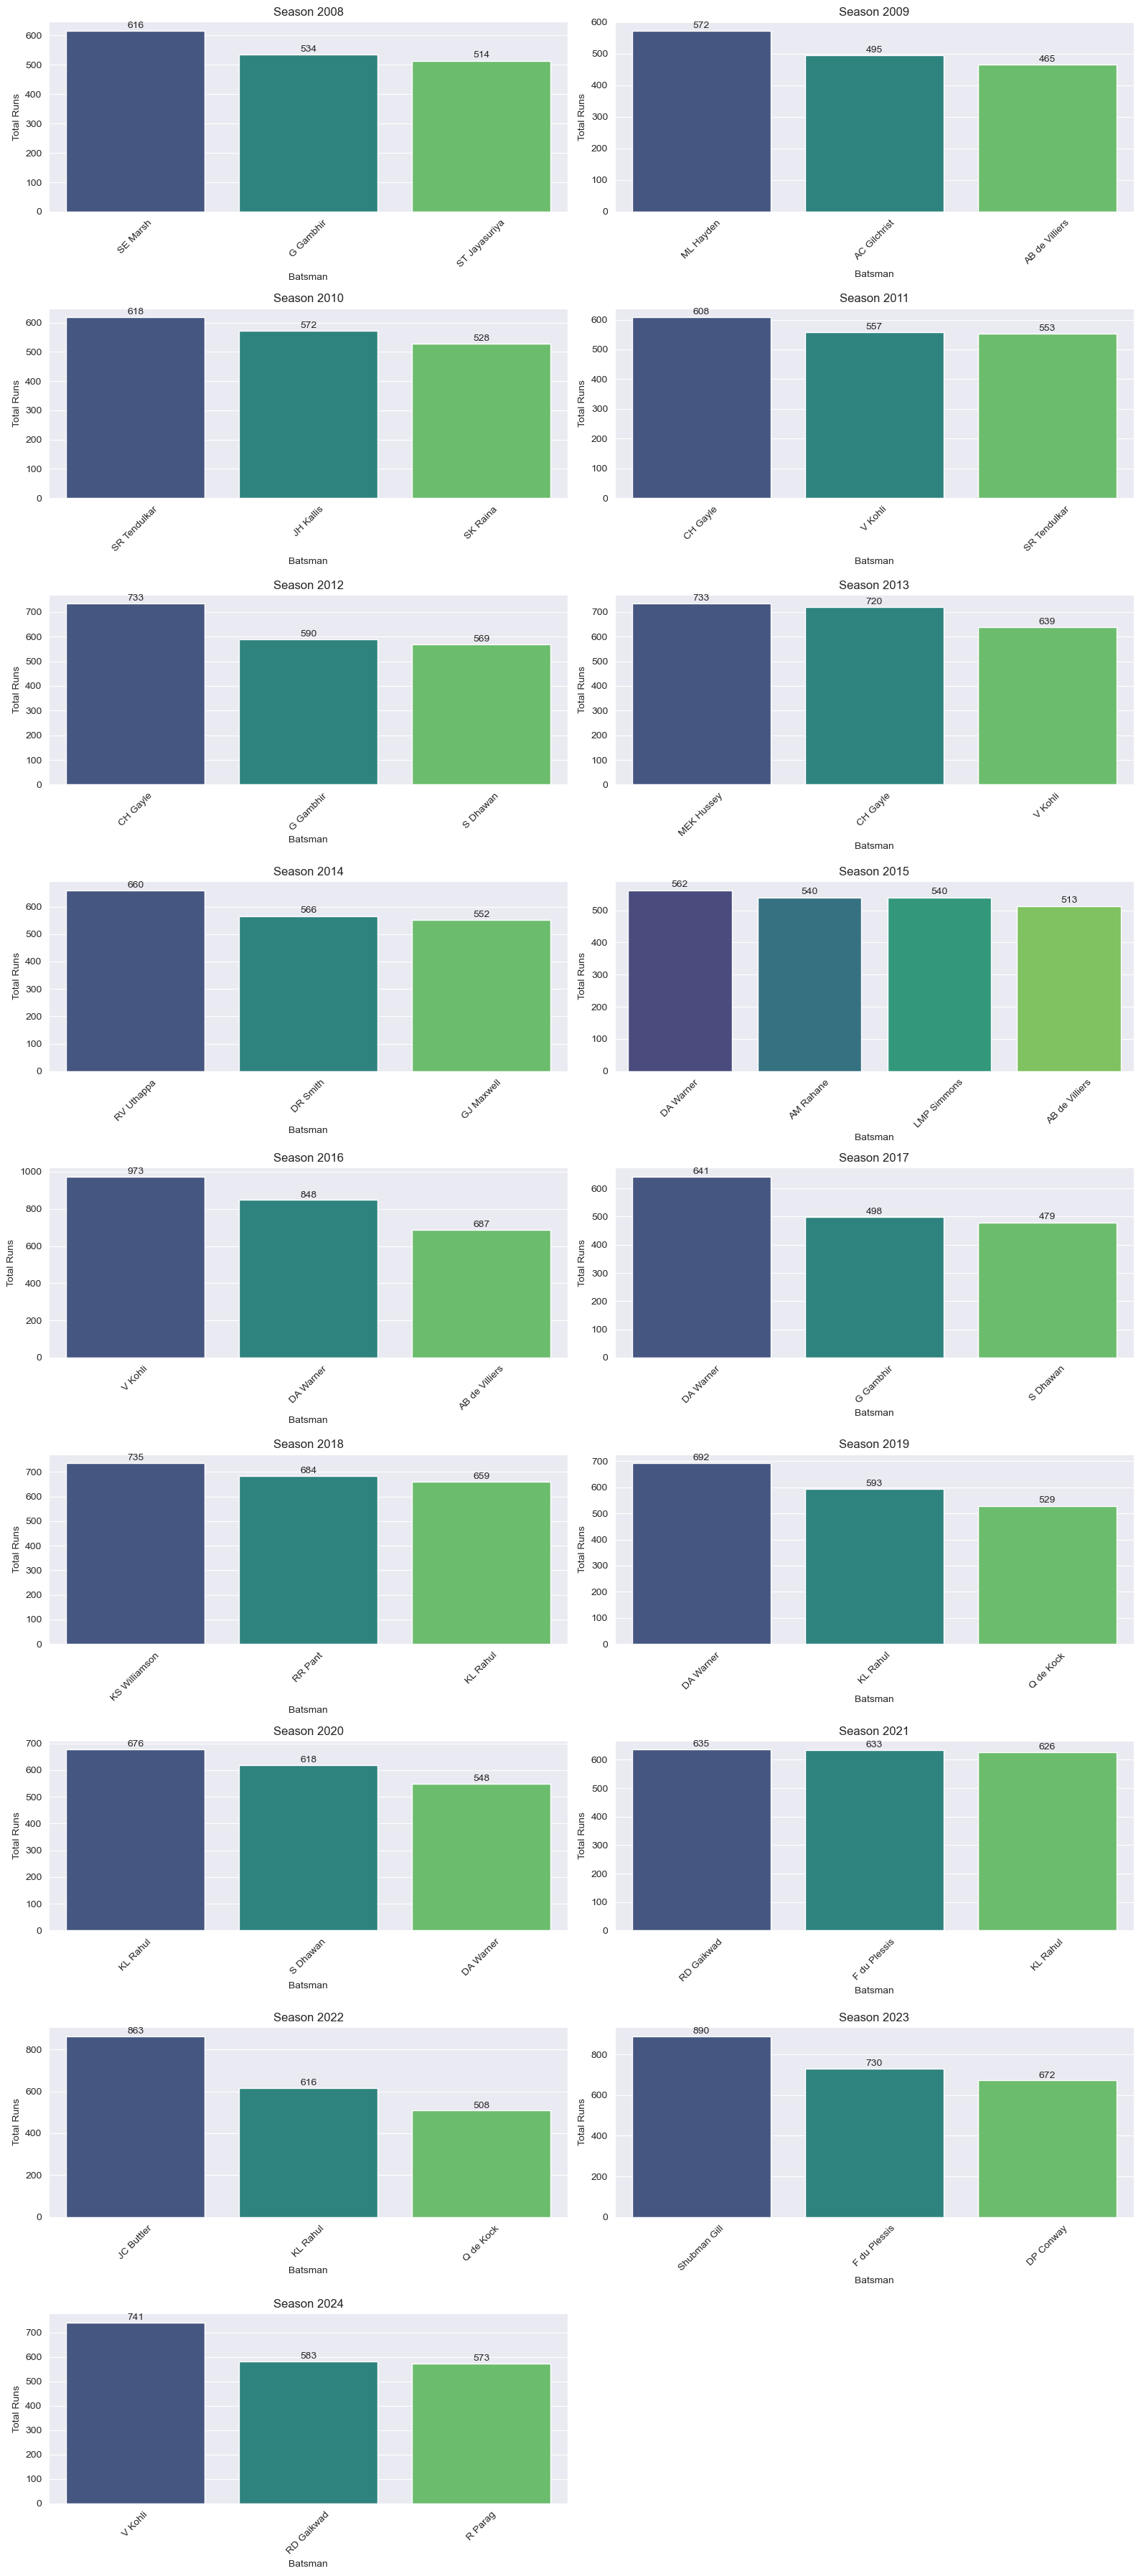

In [48]:
# 12. Top 3 Scorers per Season
season_runs = deliveries.merge(matches[['id', 'season']], left_on = 'match_id', right_on = 'id')
player_runs = season_runs.groupby(['season', 'batter'])['batsman_runs'].sum().reset_index()
player_runs['rank'] = player_runs.groupby('season')['batsman_runs'].rank(method = 'dense', ascending = False)
top3_per_season = player_runs[player_runs['rank'] <= 3].sort_values(by = ['season', 'rank'])

grouped = top3_per_season.groupby('season')

n_seasons = len(grouped)
n_rows = (n_seasons + 1) // 2

fig, axes = plt.subplots(n_rows, 2, figsize = (16, 4 * n_rows))
axes = axes.flatten()

for idx, (season, group) in enumerate(grouped):
    ax = axes[idx]
    sns.barplot(data = group, x = 'batter', y = 'batsman_runs', hue = 'batter', palette = 'viridis', ax = ax)
    ax.set_title(f'Season {season}')
    ax.set_xlabel('Batsman')
    ax.set_ylabel('Total Runs')
    ax.tick_params(axis = 'x', rotation = 45)
    
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.,
            height + 3,                        
            f'{int(height)}',  
            ha = 'center',              
            va = 'bottom',
            fontsize = 10
        )

for ax in axes[n_seasons:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

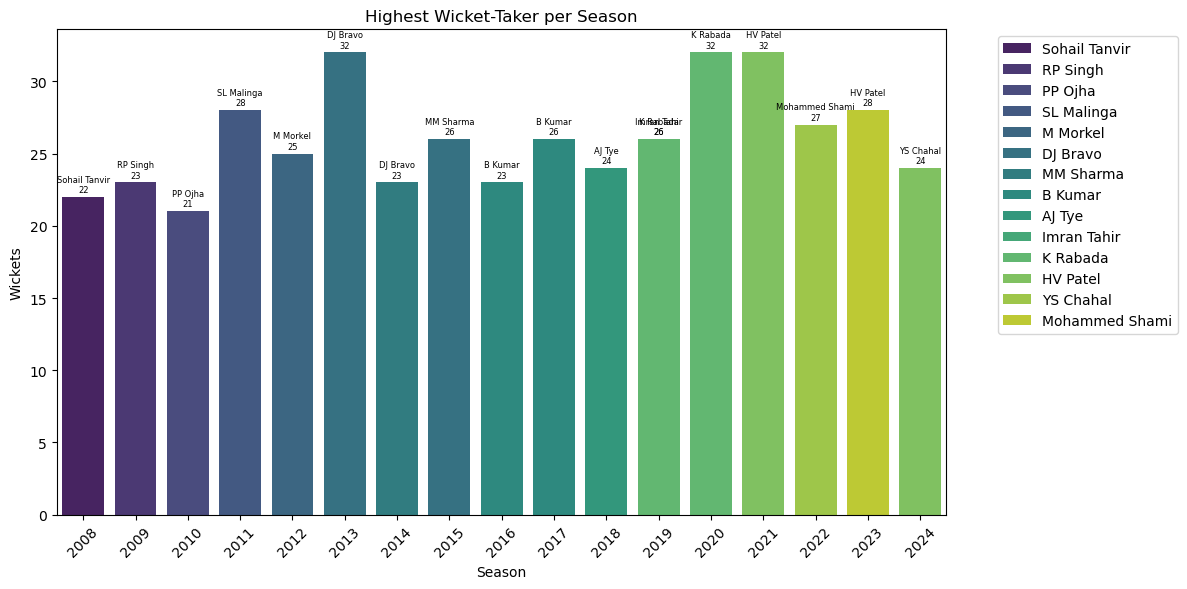

In [39]:
# 13. Season-wise Top Wicket Taker
season_wickets = deliveries[deliveries['is_wicket'] == 1 & (~deliveries['dismissal_kind'].isin(['run out', 'retired hurt', 'obstructing the field']))]
season_wickets = season_wickets.merge(matches[['id', 'season']], left_on = 'match_id', right_on = 'id')
wickets_per_season = season_wickets.groupby(['season', 'bowler']).size().reset_index(name = 'wickets')
wickets_per_season['rank'] = wickets_per_season.groupby('season')['wickets'].rank(method = 'dense', ascending = False)
res = wickets_per_season[wickets_per_season['rank'] == 1]

plt.figure(figsize = (12, 6))
ax = sns.barplot(data = res, x = 'season', y = 'wickets', hue = 'bowler', dodge = False, palette = 'viridis')
plt.title('Highest Wicket-Taker per Season')
plt.xlabel('Season')
plt.ylabel('Wickets')
plt.xticks(rotation=45)

res = res.sort_values(['season', 'bowler'])

for idx, bar in enumerate(ax.patches):
    if idx < len(res):
        bowler_name = res.iloc[idx]['bowler']
        wickets = int(bar.get_height())
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.2,
            f"{bowler_name}\n{wickets}",
            ha ='center',
            va ='bottom',
            fontsize = 6
        )

plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.tight_layout()
plt.show()

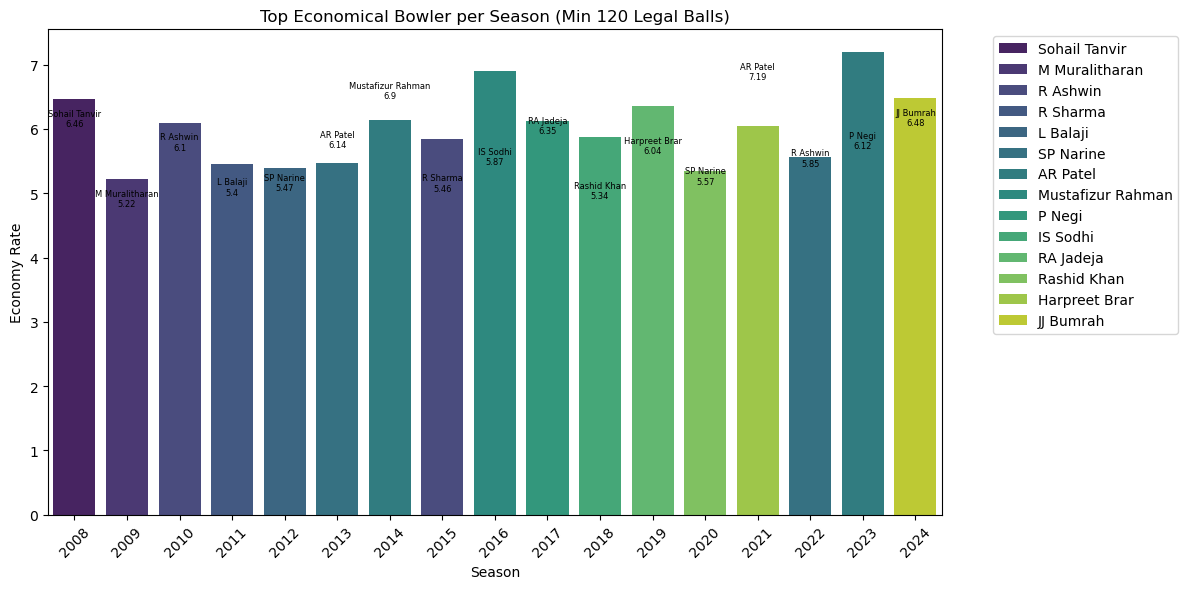

In [40]:
# 14. Bowlers with Best Economy in Each Season
merged = deliveries.merge(matches[['id','season']], left_on = 'match_id', right_on = 'id')
season_eco = merged.groupby(['season','bowler']).agg(
    total_delivery = ('match_id','count'),
    legal_balls = ('extras_type', lambda x: ((~x.isin(['wides','noballs'])) | x.isna()).sum()),
    runs = ('total_runs', lambda x: x[~merged.loc[x.index,'extras_type'].isin(['byes','legbyes'])].sum())
).reset_index()
season_eco = season_eco[season_eco['legal_balls'] > 120]
season_eco['economy'] = round(season_eco['runs'] * 6 / season_eco['legal_balls'], 2)
season_eco['rnk'] = season_eco.groupby('season')['economy'].rank(method = 'first', ascending = True)
ranked_bowler = season_eco[season_eco['rnk'] == 1].sort_values('season')

plt.figure(figsize = (12, 6))
ax = sns.barplot(data=ranked_bowler, x = 'season', y = 'economy', hue = 'bowler', dodge = False, palette = 'viridis')
plt.title('Top Economical Bowler per Season (Min 120 Legal Balls)')
plt.xlabel('Season')
plt.ylabel('Economy Rate')
plt.xticks(rotation = 45)

for bar, (idx, row) in zip(ax.patches, ranked_bowler.iterrows()):
    ax.text(
        bar.get_x() + bar.get_width() / 2,    
        row['economy'] - 0.3,                 
        f"{row['bowler']}\n{row['economy']}", 
        ha = 'center',                          
        va = 'center',                          
        color = 'black',                        
        fontsize = 6
    )

plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.tight_layout()
plt.show()

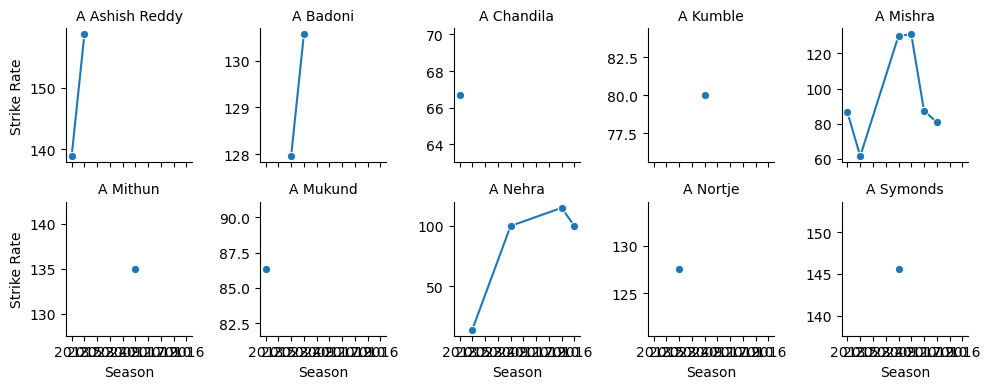

In [41]:
# 15. Players Who Improved Strike Rate Over Time
merged = deliveries.merge(matches[['id', 'season']], left_on = 'match_id', right_on = 'id')
season_sr = (
    merged.groupby(['season', 'batter'], as_index = False)
    .agg(ball_faced = ('id', 'count'), runs = ('batsman_runs', 'sum'))
) 
season_sr['strike_rate'] = round(season_sr['runs'] * 100 / season_sr['ball_faced'], 2)
season_sr = season_sr.sort_values(['batter', 'season'])
season_sr['prev_sr'] = season_sr.groupby('batter')['strike_rate'].shift(1)
result = season_sr[(season_sr['prev_sr'].notnull()) & (season_sr['strike_rate'] > season_sr['prev_sr'])]
result = result.reset_index(drop = True)
res = result.head(20)

g = sns.FacetGrid(res, col='batter', col_wrap=5, height=2, sharey=False)
g.map(sns.lineplot, 'season', 'strike_rate', marker='o')
g.set_titles("{col_name}")
g.set_axis_labels("Season", "Strike Rate")
plt.tight_layout()
plt.show()

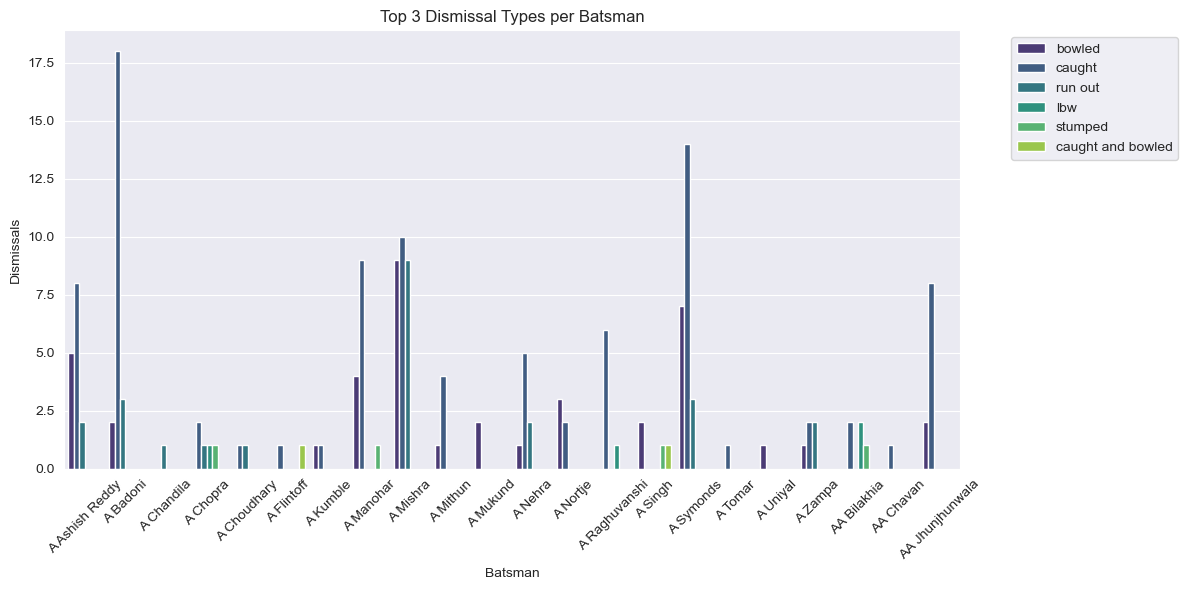

In [42]:
# 16. Dismissal Trends of a Batter
dismissals = deliveries[~deliveries['dismissal_kind'].isna()]
dismissal_count = dismissals.groupby(['batter', 'dismissal_kind']).size().reset_index(name = 'dismissals')
dismissal_count['rank'] = dismissal_count.groupby('batter')['dismissals'].rank(ascending = False)
top_dismissals = dismissal_count[(dismissal_count['rank'] <= 3) & (dismissal_count['dismissal_kind'] != 'NA')].head(50)

plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")  # For better visibility
sns.barplot(
    data=top_dismissals,
    x='batter',
    y='dismissals',
    hue='dismissal_kind',
    palette='viridis',
    dodge=True  # Default, but ensure it's True for clarity
)
plt.title('Top 3 Dismissal Types per Batsman')
plt.xlabel('Batsman')
plt.ylabel('Dismissals')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()